# autonomous vehicles

In [1]:
from gurobipy import *
import numpy as np
import time
import sys
from vehicle import Car
import matplotlib.pyplot as plt
print(sys.path)

['C:\\Users\\nesto\\OneDrive\\Documentos\\GitHub\\Thesis-Nestor\\Python', 'C:\\Users\\nesto\\OneDrive\\Documentos\\GitHub\\Thesis-Nestor', 'C:\\Users\\nesto\\anaconda3\\python37.zip', 'C:\\Users\\nesto\\anaconda3\\DLLs', 'C:\\Users\\nesto\\anaconda3\\lib', 'C:\\Users\\nesto\\anaconda3', '', 'C:\\Users\\nesto\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\nesto\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32', 'C:\\Users\\nesto\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib', 'C:\\Users\\nesto\\AppData\\Roaming\\Python\\Python37\\site-packages\\Pythonwin', 'C:\\Users\\nesto\\anaconda3\\lib\\site-packages', 'C:\\Users\\nesto\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\nesto\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\nesto\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\nesto\\AppData\\Roaming\\Python\\Python37\\site-packages\\IPython\\extensions', 'C:\\Users\\nesto\\.ipython']


In [2]:
nx = 1  # Number of agents
nu = 1  # Number of inputs
nv = 2  #numero de vehiculos sin el agente no cooperativo
# MPC data
Q = 1  #* np.identity(1)
R = 10  #* np.identity(1)
N = 7  #horizon
dt = 0.1  #[s]
Ds = 7  #Safety distance [m]
Dl = 25  #lateral distance
V_max = 80
A_max = 30
L = 6  #number of lanes
Mmax = L - 1
mmin = -L + 1
p_max = 1


In [3]:

# %------condiciones iniciales----------
vel = np.array([20, 20])  # velociodad inicial
Vdes = np.array([30, 80])  # velocidad deseada

zel = np.array([5, 4])  # carril inicial
Zdes = np.array([1, 1])  # carril deseado

acel = np.array([0, 0])
# %---distancia inicial de cada agente
d1i = np.array([-50])
i = 0
zel2 = zel  #same dimentions
LR2 = 1
LR1 = 1

In [4]:
# create the model
vh1 = Car(vel[0], zel[0], Vdes[0], Zdes[0], N, name="vehiculo_1")
vh2 = Car(vel[1], zel[1], Vdes[1], Zdes[1], N, name="vehiculo_2")



In [5]:
%%time
vh1.create_model()
vh2.create_model()
vh1.m.update()
vh2.m.update()


Academic license - for non-commercial use only - expires 2021-05-16
Using license file C:\Users\nesto\gurobi.lic
Wall time: 16 ms


In [6]:
%%capture --no-stderr
hist_d =[]
t = time.time()
sim_tim = 23
for k in range(sim_tim):
    vh1.update_cnt(zel[0],vel[0],Zdes[0],Vdes[0],vel[1],zel[1],d1i[0])
    vh1.m.update()
    vh1.m.optimize()
    vh2.update_cnt(zel[1],vel[1],Zdes[1],Vdes[1],vel[0],zel[0],-d1i[0])
    vh2.m.update()
    vh2.m.optimize()
    k
    # get optimal solution
    acel[0], zel[0] = vh1.get_var(N)
    acel[1], zel[1] = vh2.get_var(N)

    vel[0], zel[0] = vh1.make_step(acel[0],zel[0])
    vel[1], zel[1] = vh2.make_step(acel[1],zel[1])
    d1i = d1i + dt*(vel[1:]-vel[0])
    hist_d.append(d1i)
elapsed = time.time() - t




In [7]:
hist_pred_z1 = np.array(vh1.hist_zp1)
hist_pred_z2 = np.array(vh2.hist_zp1)
hist_pred_v1 = np.array(vh1.hist_vp1)
hist_pred_v2 = np.array(vh2.hist_vp1)
hist_time = np.arange(0,sim_tim)
hist_pred_v2.shape

(23, 7)

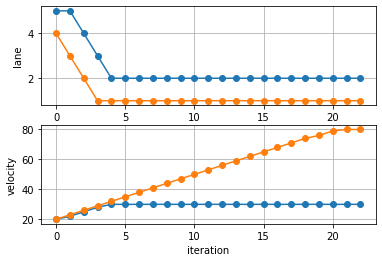

In [8]:
# plot the data
# fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 1)
# ax = fig.add_subplot(2, 1, 1)
ax1.plot(hist_time,hist_pred_z1[:,0], marker='o' , color='tab:blue')
ax1.plot(hist_time,hist_pred_z2[:,0], marker='o' , color='tab:orange')
ax1.set_xlabel('iteration')
ax1.set_ylabel('lane')
ax1.grid(True)

ax2.plot(hist_time,hist_pred_v1[:,0], marker='o' , color='tab:blue')
ax2.plot(hist_time,hist_pred_v2[:,0], marker='o' , color='tab:orange')
ax2.set_xlabel('iteration')
ax2.set_ylabel('velocity')
ax2.grid(True)


In [9]:
print("Elapsed time: {}[s]".format(round(elapsed,3)))
print("the objective function is :" + str(round(vh1.m.ObjVal, 2)))
for v in vh1.m.getVars():
    print("vh1: "+str(v.VarName), v.x)

Elapsed time: 0.201[s]
the objective function is :0.0
vh1: Zd 1.0
vh1: Vd 30.0
vh1: Ds[0] 7.0
vh1: Ds[1] 7.0
vh1: Ds[2] 7.0
vh1: Ds[3] 7.0
vh1: Ds[4] 7.0
vh1: Ds[5] 7.0
vh1: Ds[6] 7.0
vh1: v[0] 30.0
vh1: v[1] 30.0
vh1: v[2] 30.0
vh1: v[3] 30.0
vh1: v[4] 30.0
vh1: v[5] 30.0
vh1: v[6] 30.0
vh1: v[7] 30.0
vh1: a[0] 0.0
vh1: a[1] 0.0
vh1: a[2] 0.0
vh1: a[3] 0.0
vh1: a[4] 0.0
vh1: a[5] 0.0
vh1: a[6] 0.0
vh1: z[0] 2.0
vh1: z[1] 1.0
vh1: z[2] 1.0
vh1: z[3] 1.0
vh1: z[4] 1.0
vh1: z[5] 1.0
vh1: z[6] 1.0
vh1: z[7] 1.0
vh1: ll[0] 0.0
vh1: ll[1] 1.0
vh1: ll[2] 1.0
vh1: ll[3] 1.0
vh1: ll[4] 1.0
vh1: ll[5] 1.0
vh1: ll[6] 1.0
vh1: lr[0] 1.0
vh1: lr[1] -0.0
vh1: lr[2] -0.0
vh1: lr[3] -0.0
vh1: lr[4] -0.0
vh1: lr[5] -0.0
vh1: lr[6] -0.0
vh1: lr2 0.0
vh1: v_2 80.0
vh1: z_2 1.0
vh1: dis12[0] 4.300000000000006
vh1: dis12[1] 9.300000000000006
vh1: dis12[2] 14.300000000000004
vh1: dis12[3] 19.300000000000004
vh1: dis12[4] 24.300000000000004
vh1: dis12[5] 29.300000000000004
vh1: dis12[6] 34.300000000000004
v

In [10]:
# print("Elapsed time: {}[s]".format(round(elapsed,3)))
print("the objective function is :" + str(round(vh1.m.ObjVal, 2)))
for v in vh2.m.getVars():
    print("vh2: "+str(v.VarName), v.x)


the objective function is :0.0
vh2: Zd 1.0
vh2: Vd 80.0
vh2: Ds[0] 7.0
vh2: Ds[1] 7.0
vh2: Ds[2] 7.0
vh2: Ds[3] 7.0
vh2: Ds[4] 7.0
vh2: Ds[5] 7.0
vh2: Ds[6] 7.0
vh2: v[0] 80.0
vh2: v[1] 79.99989135618249
vh2: v[2] 79.9998921987001
vh2: v[3] 79.9998857388243
vh2: v[4] 79.99987620489269
vh2: v[5] 79.99986502938856
vh2: v[6] 79.99985542519565
vh2: v[7] 79.99984944563134
vh2: a[0] -0.0010864381750934626
vh2: a[1] 8.42517601995496e-06
vh2: a[2] -6.459875785580493e-05
vh2: a[3] -9.533931612537572e-05
vh2: a[4] -0.00011175504129568026
vh2: a[5] -9.604192914736132e-05
vh2: a[6] -5.9795643089444184e-05
vh2: z[0] 1.0
vh2: z[1] 1.0
vh2: z[2] 1.0
vh2: z[3] 1.0
vh2: z[4] 1.0
vh2: z[5] 1.0
vh2: z[6] 1.0
vh2: z[7] 1.0
vh2: ll[0] 1.0
vh2: ll[1] 1.0
vh2: ll[2] 1.0
vh2: ll[3] 1.0
vh2: ll[4] 1.0
vh2: ll[5] 1.0
vh2: ll[6] 1.0
vh2: lr[0] 0.0
vh2: lr[1] 0.0
vh2: lr[2] 0.0
vh2: lr[3] 0.0
vh2: lr[4] 0.0
vh2: lr[5] 0.0
vh2: lr[6] 0.0
vh2: lr2 0.0
vh2: v_2 30.0
vh2: z_2 2.0
vh2: dis12[0] -4.300000000000006
vh2:

In [11]:
hist_d

[array([-49.9]),
 array([-49.8]),
 array([-49.7]),
 array([-49.5]),
 array([-49.]),
 array([-48.2]),
 array([-47.1]),
 array([-45.7]),
 array([-44.]),
 array([-42.]),
 array([-39.7]),
 array([-37.1]),
 array([-34.2]),
 array([-31.]),
 array([-27.5]),
 array([-23.7]),
 array([-19.6]),
 array([-15.2]),
 array([-10.6]),
 array([-5.7]),
 array([-0.7]),
 array([4.3]),
 array([9.3])]